# Project: Predictive Analysis of World Cup 

In [39]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
import os



sys.path.append(os.path.abspath(".."))
from src.cleaning import clean_matches
sys.path.append("../src") 


In [40]:
# data
goals = pd.read_csv("../data/raw/goals.csv")
player_app = pd.read_csv("../data/raw/player_appearances.csv")
players = pd.read_csv("../data/raw/players.csv")
team_app = pd.read_csv("../data/raw/team_appearances.csv")
group_standings = pd.read_csv("../data/raw/group_standings.csv")
tourney_standings = pd.read_csv("../data/raw/tournament_standings.csv")
penalty_kicks = pd.read_csv("../data/raw/penalty_kicks.csv")
teams = pd.read_csv("../data/raw/teams.csv")
# cleaning of matches via cleaning.py
matches_clean = clean_matches()

In [41]:
# cleaning data for datasets not cleaned in cleaning.py

# checking for nulls/na's
print("Total for goals:", goals.isna().sum().sum())
print("Total for players_app:", player_app.isna().sum().sum())
print("Total for players:", players.isna().sum().sum())
print("Total for teams:", teams.isna().sum().sum())
print("Total for team_app:", team_app.isna().sum().sum())
print("Total for group_standings", group_standings.isna().sum().sum())
print("Total for tourney_standings:", tourney_standings.isna().sum().sum())
print("Total for penalty_kicks:", penalty_kicks.isna().sum().sum())

# filling the NA's/Nulls
players['birth_date'] = players['birth_date'].fillna('Unknown')

# removing women's data - only care about men's FIFA World Cup
men_goals = goals[~goals["tournament_name"].str.contains("Women")]
men_player_app = player_app[~player_app["tournament_name"].str.contains("Women")]
men_players = players[players["female"] == False]
men_group_standings = group_standings[~group_standings["tournament_name"].str.contains("Women")]
men_tourney_standings = tourney_standings[~tourney_standings["tournament_name"].str.contains("Women")]
men_penalty_kicks = penalty_kicks[~penalty_kicks["tournament_name"].str.contains("Women")]

# cleaning data further - after teammate made cleaning.py for matches
matches_clean = matches_clean[~matches_clean["tournament_name"].str.contains("Women")]
teams = teams.drop(columns=["womens_team", "mens_team_wikipedia_link" , "womens_team_wikipedia_link" , "federation_wikipedia_link"], axis=1)

# cleaned datasets
display(matches_clean.head(5))
display(men_goals.head(5))
display(men_player_app.head(5))
display(men_players.head(5))
display(team_app.head(5))
display(teams.head(5))
display(tourney_standings.head(5))
display(penalty_kicks.head(5))

Total for goals: 0
Total for players_app: 0
Total for players: 1
Total for teams: 0
Total for team_app: 0
Total for group_standings 0
Total for tourney_standings: 0
Total for penalty_kicks: 0


,key_id,tournament_id,tournament_name,match_id,match_name,stage,group,group_stage,knockout_stage,replayed,...,score_penalties,home_team_score_penalties,away_team_score_penalties,result,home_team_win,away_team_win,draw,year,goal_diff_home,match_result_1x2
0,1,WC-1930,1930 FIFA Men's World Cup,M-1930-01,France vs Mexico,group stage,Group 1,1,0,0,...,0-0,0,0,home team win,1,0,0,1930,3,win
1,2,WC-1930,1930 FIFA Men's World Cup,M-1930-02,United States vs Belgium,group stage,Group 4,1,0,0,...,0-0,0,0,home team win,1,0,0,1930,3,win
2,3,WC-1930,1930 FIFA Men's World Cup,M-1930-03,Yugoslavia vs Brazil,group stage,Group 2,1,0,0,...,0-0,0,0,home team win,1,0,0,1930,1,win
3,4,WC-1930,1930 FIFA Men's World Cup,M-1930-04,Romania vs Peru,group stage,Group 3,1,0,0,...,0-0,0,0,home team win,1,0,0,1930,2,win
4,5,WC-1930,1930 FIFA Men's World Cup,M-1930-05,Argentina vs France,group stage,Group 1,1,0,0,...,0-0,0,0,home team win,1,0,0,1930,1,win


,key_id,goal_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,group_name,team_id,...,shirt_number,player_team_id,player_team_name,player_team_code,minute_label,minute_regulation,minute_stoppage,match_period,own_goal,penalty
0,1,G-0001,WC-1930,1930 FIFA Men's World Cup,M-1930-01,France vs Mexico,1930-07-13,group stage,Group 1,T-30,...,0,T-30,France,FRA,19',19,0,first half,0,0
1,2,G-0002,WC-1930,1930 FIFA Men's World Cup,M-1930-01,France vs Mexico,1930-07-13,group stage,Group 1,T-30,...,0,T-30,France,FRA,40',40,0,first half,0,0
2,3,G-0003,WC-1930,1930 FIFA Men's World Cup,M-1930-01,France vs Mexico,1930-07-13,group stage,Group 1,T-30,...,0,T-30,France,FRA,43',43,0,first half,0,0
3,4,G-0004,WC-1930,1930 FIFA Men's World Cup,M-1930-01,France vs Mexico,1930-07-13,group stage,Group 1,T-46,...,0,T-46,Mexico,MEX,70',70,0,second half,0,0
4,5,G-0005,WC-1930,1930 FIFA Men's World Cup,M-1930-01,France vs Mexico,1930-07-13,group stage,Group 1,T-30,...,0,T-30,France,FRA,87',87,0,second half,0,0


,key_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,group_name,team_id,team_name,...,home_team,away_team,player_id,family_name,given_name,shirt_number,position_name,position_code,starter,substitute
0,1,WC-1970,1970 FIFA Men's World Cup,M-1970-01,Mexico vs Soviet Union,1970-05-31,group stage,Group 1,T-46,Mexico,...,1,0,P-66980,Calderón,Ignacio,1,goal keeper,GK,1,0
1,2,WC-1970,1970 FIFA Men's World Cup,M-1970-01,Mexico vs Soviet Union,1970-05-31,group stage,Group 1,T-46,Mexico,...,1,0,P-64553,Peña,Gustavo,3,defender,DF,1,0
2,3,WC-1970,1970 FIFA Men's World Cup,M-1970-01,Mexico vs Soviet Union,1970-05-31,group stage,Group 1,T-46,Mexico,...,1,0,P-42664,Pérez,Mario,5,defender,DF,1,0
3,4,WC-1970,1970 FIFA Men's World Cup,M-1970-01,Mexico vs Soviet Union,1970-05-31,group stage,Group 1,T-46,Mexico,...,1,0,P-69898,Hernández,Guillermo,6,midfielder,MF,1,0
4,5,WC-1970,1970 FIFA Men's World Cup,M-1970-01,Mexico vs Soviet Union,1970-05-31,group stage,Group 1,T-46,Mexico,...,1,0,P-56971,Salgado,Horacio López,10,forward,FW,1,0


,key_id,player_id,family_name,given_name,birth_date,female,goal_keeper,defender,midfielder,forward,count_tournaments,list_tournaments,player_wikipedia_link
0,1,P-35894,A'Court,Alan,1934-09-30,0,0,0,0,1,1,1958,https://en.wikipedia.org/wiki/Alan_A%27Court
2,3,P-03484,Aaronson,Brenden,2000-10-22,0,0,0,0,1,1,2022,https://en.wikipedia.org/wiki/Brenden_Aaronson
3,4,P-04189,Abadzhiev,Stefan,1934-07-03,0,0,0,0,1,1,1966,https://en.wikipedia.org/wiki/Stefan_Abadzhiev
4,5,P-03523,Abalo,Jean-Paul,1975-06-26,0,0,1,0,0,1,2006,https://en.wikipedia.org/wiki/Jean-Paul_Abalo
6,7,P-35138,Abanda,Patrice,1978-08-03,0,0,1,0,0,1,1998,https://en.wikipedia.org/wiki/Patrice_Abanda


,key_id,tournament_id,tournament_name,match_id,match_name,stage_name,group_name,group_stage,knockout_stage,replayed,...,goals_against,goal_differential,extra_time,penalty_shootout,penalties_for,penalties_against,result,win,lose,draw
0,1,WC-1930,1930 FIFA Men's World Cup,M-1930-01,France vs Mexico,group stage,Group 1,1,0,0,...,1,3,0,0,0,0,win,1,0,0
1,2,WC-1930,1930 FIFA Men's World Cup,M-1930-01,France vs Mexico,group stage,Group 1,1,0,0,...,4,-3,0,0,0,0,lose,0,1,0
2,3,WC-1930,1930 FIFA Men's World Cup,M-1930-02,United States vs Belgium,group stage,Group 4,1,0,0,...,0,3,0,0,0,0,win,1,0,0
3,4,WC-1930,1930 FIFA Men's World Cup,M-1930-02,United States vs Belgium,group stage,Group 4,1,0,0,...,3,-3,0,0,0,0,lose,0,1,0
4,5,WC-1930,1930 FIFA Men's World Cup,M-1930-03,Yugoslavia vs Brazil,group stage,Group 2,1,0,0,...,1,1,0,0,0,0,win,1,0,0


,key_id,team_id,team_name,team_code,mens_team,federation_name,region_name,confederation_id,confederation_name,confederation_code
0,1,T-01,Algeria,DZA,1,Algerian Football Federation,Africa,CF-2,Confederation of African Football,CAF
1,2,T-02,Angola,AGO,1,Angolan Football Federation,Africa,CF-2,Confederation of African Football,CAF
2,3,T-03,Argentina,ARG,1,Argentine Football Association,South America,CF-4,South American Football Confederation,CONMEBOL
3,4,T-04,Australia,AUS,1,Football Australia,Oceania,CF-1,Asian Football Confederation,AFC
4,5,T-05,Austria,AUT,1,Austrian Football Association,Europe,CF-6,Union of European Football Associations,UEFA


,key_id,tournament_id,tournament_name,position,team_id,team_name,team_code
0,1,WC-1930,1930 FIFA Men's World Cup,1,T-84,Uruguay,URY
1,2,WC-1930,1930 FIFA Men's World Cup,2,T-03,Argentina,ARG
2,3,WC-1930,1930 FIFA Men's World Cup,3,T-83,United States,USA
3,4,WC-1930,1930 FIFA Men's World Cup,4,T-87,Yugoslavia,YUG
4,5,WC-1934,1934 FIFA Men's World Cup,1,T-41,Italy,ITA


,key_id,penalty_kick_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,group_name,team_id,team_name,team_code,home_team,away_team,player_id,family_name,given_name,shirt_number,converted
0,1,PK-001,WC-1982,1982 FIFA Men's World Cup,M-1982-50,West Germany vs France,1982-07-08,semi-finals,not applicable,T-86,West Germany,DEU,1,0,P-68969,Kaltz,Manfred,20,1
1,2,PK-002,WC-1982,1982 FIFA Men's World Cup,M-1982-50,West Germany vs France,1982-07-08,semi-finals,not applicable,T-86,West Germany,DEU,1,0,P-48686,Breitner,Paul,3,1
2,3,PK-003,WC-1982,1982 FIFA Men's World Cup,M-1982-50,West Germany vs France,1982-07-08,semi-finals,not applicable,T-86,West Germany,DEU,1,0,P-45695,Stielike,Uli,15,0
3,4,PK-004,WC-1982,1982 FIFA Men's World Cup,M-1982-50,West Germany vs France,1982-07-08,semi-finals,not applicable,T-86,West Germany,DEU,1,0,P-89975,Littbarski,Pierre,7,1
4,5,PK-005,WC-1982,1982 FIFA Men's World Cup,M-1982-50,West Germany vs France,1982-07-08,semi-finals,not applicable,T-86,West Germany,DEU,1,0,P-59574,Rummenigge,Karl-Heinz,11,1


## Charts for Hypothesis Makings
### Hypothesis 1: Brazil has scored the most wins overall in all tournaments played
Brazil leads all nations with nearly 80 total World Cup wins, followed by Argentina, Italy, France, and Germany. However, West Germany also appears separately within the top five, despite representing the same nation today. This indicates that further consideration and data cleaning are needed, as historical country distinctions like this could affect the accuracy of the predictive model.

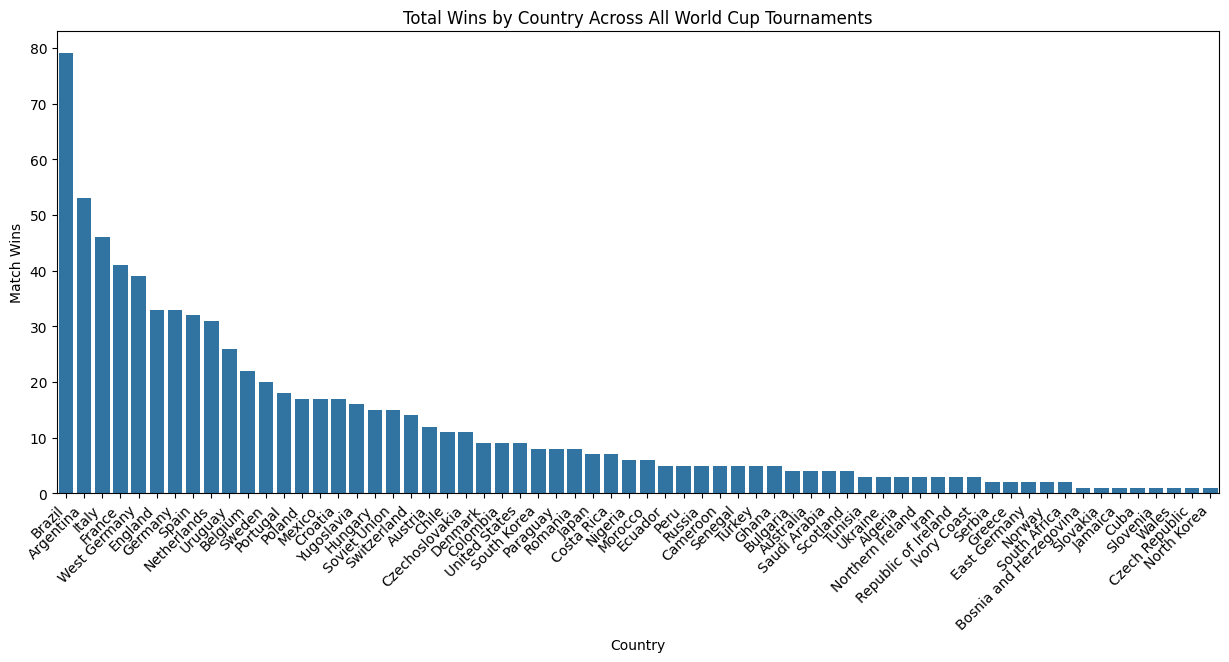

In [64]:
wins_only_home = matches_clean[matches_clean["home_team_win"] == 1]
wins_only_away = matches_clean[matches_clean["away_team_win"] == 1]

home_counts = wins_only_home["home_team_name"].value_counts().reset_index()
home_counts.columns = ["team_name", "home_wins"]

away_counts = wins_only_away["away_team_name"].value_counts().reset_index()
away_counts.columns = ["team_name", "away_wins"]

win_totals = pd.merge(home_counts, away_counts, on="team_name", how="outer").fillna(0)
win_totals["total_wins"] = win_totals["home_wins"] + win_totals["away_wins"]
win_totals = win_totals.sort_values(by="total_wins", ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(win_totals, x="team_name", y="total_wins")
plt.title(label="Total Wins by Country Across All World Cup Tournaments")
plt.xlabel("Country")
plt.ylabel("Match Wins")
plt.xticks(rotation=45, ha="right")
plt.show()